## Day 49 Lecture 2 Assignment

In this assignment, we will apply mean shift clustering to a dataset containing the results of a survey on financial wellbeing.

In [36]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.preprocessing import StandardScaler

import seaborn as sns

This dataset contains the results of a survey on a financial wellbeing conducted by the US Consumer Finance Protection Bureau that were published in October 2017. This dataset has a large number of columns, most of which correspond to specific questions on the survey. These codebook for translating the column names to questions can be found here:

https://s3.amazonaws.com/files.consumerfinance.gov/f/documents/cfpb_nfwbs-puf-codebook.pdf

Load the dataset.

In [2]:
# answer goes here
fin_df = pd.read_csv('data/financial_wellbeing.csv')
fin_df




,PUF_ID,sample,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_3,...,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PCTLT200FPL,finalwt
0,10350,2,3,5,5,6,55,3,3,3,...,1,4,8,0,0,0,0,1,0,0.367292
1,7740,1,3,6,6,6,51,2,2,3,...,1,2,3,0,0,0,0,2,0,1.327561
2,13699,1,3,4,3,4,49,3,3,3,...,1,4,9,0,0,0,1,2,1,0.835156
3,7267,1,3,6,6,6,49,3,3,3,...,1,3,7,0,0,0,0,1,0,1.410871
4,7375,1,3,4,4,4,49,3,3,3,...,1,2,4,0,0,1,0,4,1,4.260668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6389,11220,3,3,6,7,7,61,3,3,1,...,1,2,3,0,0,0,1,2,-5,0.522504
6390,13118,3,2,7,7,7,59,3,4,2,...,1,3,6,0,0,0,0,3,-5,1.015219
6391,8709,1,3,5,6,6,59,3,4,3,...,1,1,2,0,0,0,0,2,0,1.136270
6392,8515,1,3,5,5,5,46,2,2,3,...,1,4,9,0,0,0,0,2,0,1.224941


While the survey questions have the potential for interesting cluster analysis, we will stick to the "score" columns to avoid clustering in an unreasonably high-dimensional space. The columns we are interested in all have "score" in their names; identify and isolate these columns. (There should be 4 in total.)

In [26]:
# answer goes here
scores_df = fin_df.filter(like='score')
scores_df.head()



,FWBscore,FSscore,LMscore,KHscore
0,55,44,3,1.267
1,51,43,3,-0.570
2,49,42,3,-0.188
3,49,42,2,-1.485
4,49,42,1,-1.900


In [19]:
pd.DataFrame(scores_std).head()

,0,1,2,3
0,-0.073062,-0.530906,0.653830,1.624716
1,-0.355677,-0.609920,0.653830,-0.629626
2,-0.496984,-0.688935,0.653830,-0.160841
3,-0.496984,-0.688935,-0.670399,-1.752502
4,-0.496984,-0.688935,-1.994628,-2.261785


Standardize the features in your dataset using scikit-learn's StandardScaler, which will set the mean of each feature to 0 and the variance to 1.

In [7]:
# answer goes here
scaler = StandardScaler()
scores_std = scaler.fit_transform(scores_df)
scores_std




array([[-0.07306245, -0.53090616,  0.65383032,  1.62471561],
       [-0.35567668, -0.6099205 ,  0.65383032, -0.62962645],
       [-0.4969838 , -0.68893483,  0.65383032, -0.16084111],
       ...,
       [ 0.20955178,  0.02219421, -0.67039872, -1.42116191],
       [-0.70894447,  0.25923722, -0.67039872, -1.42116191],
       [-0.4969838 , -0.68893483, -0.67039872, -1.42116191]])

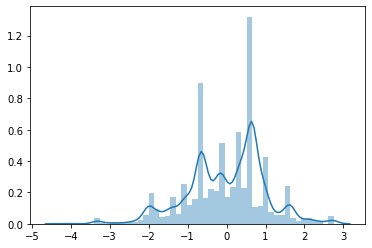

In [41]:
sns.distplot(scores_std.flatten())

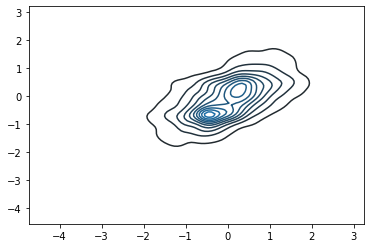

In [48]:
sns.kdeplot(scores_std[:,0], scores_std[:,1])

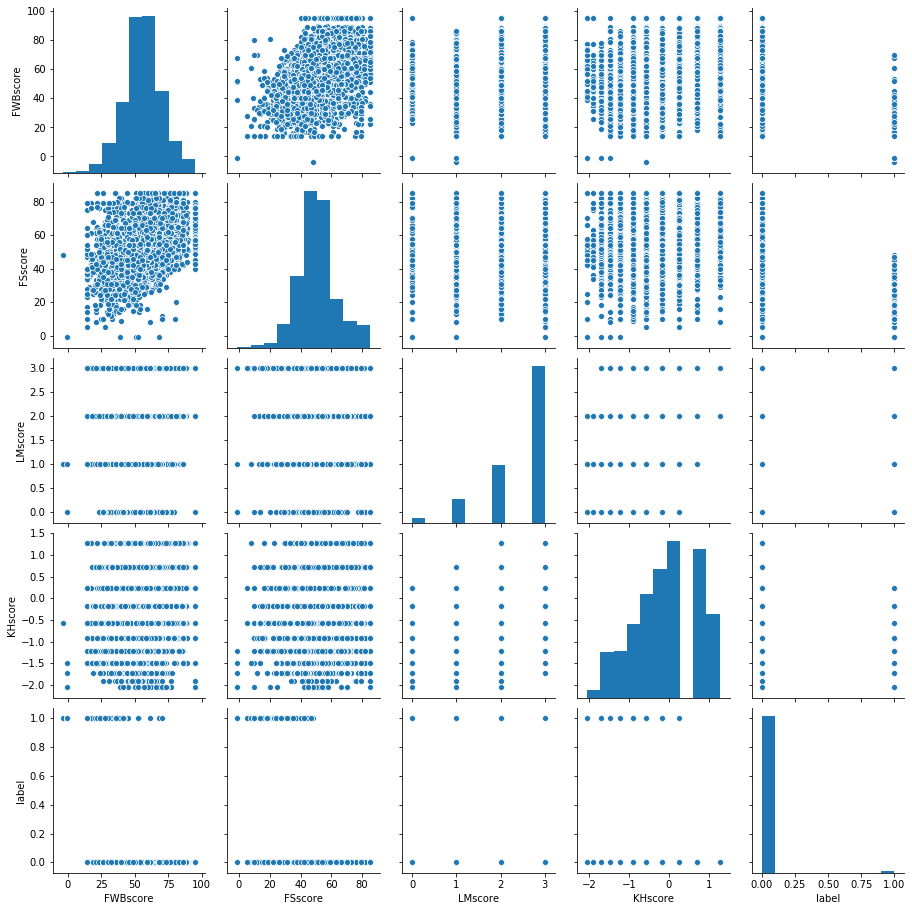

In [49]:
sns.pairplot(scores_df, )
    

Run mean shift clustering on the scores in the survey dataset using the default bandwidth. Then answer the following by printing or typing as appropriate:

- How many clusters are produced? 
- What are the cluster centers?
- How many responses are assigned to each cluster?
- Are these results reasonable? If not, what changes should we make?

In [33]:
# answer goes here
ms_clst = MeanShift()
ms_clst.fit(scores_std)


MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, max_iter=300,
          min_bin_freq=1, n_jobs=None, seeds=None)

In [34]:
ms_clst.bandwidth

In [13]:
# number of clusters, number assigned
pd.Series(ms_clst.labels_).value_counts()

0    6326
1      68
dtype: int64

In [15]:
scaler.inverse_transform(ms_clst.cluster_centers_)

array([[57.43795268, 50.12143892,  2.8143409 ,  0.21741429],
       [-1.        , -1.        ,  0.25      , -1.826     ]])

In [ ]:
# results aren't reasonable.

Try changing the appropriate parameters of the mean shift algorithm to achieve a better clustering result. Answer all of the same questions from the previous clustering step.

In [35]:
# answer goes here
ms_clst = MeanShift(bandwidth=2)
ms_clst.fit(scores_std)
pd.Series(ms_clst.labels_).value_counts()




0    6326
1      68
dtype: int64

In [37]:
estimate_bandwidth(scores_std)

1.9962824784211841

In [44]:
labels = ms_clst.labels_

In [45]:
scores_df['label'] = labels

C:\Users\dgump\miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
score_df['labels'].value_counts()

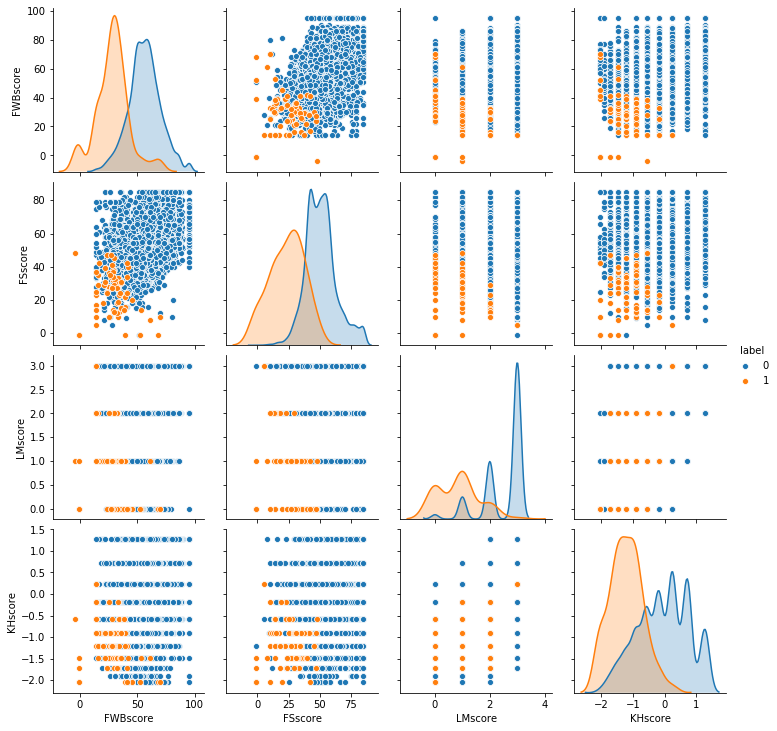

In [51]:
sns.pairplot(scores_df, hue='label')


In [53]:
scores_df.groupby('label').mean().style.background_gradient()

,FWBscore,FSscore,LMscore,KHscore
label,,,,
0,56.329434,51.010117,2.524028,-0.044526
1,28.558824,23.647059,0.852941,-1.211338


In [ ]:
scores_df['']